<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se no Estudo das Técnicas de Machine Learning - Clusterizacao e Redução de Dimensionalidade. </i>       
</p>  

# <font color='red' style='font-size: 40px;'>Library and Data </font>

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import datetime
import plotly.express as px 
import plotly.graph_objects as go
import warnings



%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore') # Remove Warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'>1.0 O que é Clusterização? </font>

## 1.1) O que é Clusterização? 

<img src = 'img400.png' width = 70%>
<img src = 'img401.png' width = 70%>
<img src = './img590.png' width = '70%'>
<img src = './img591.png' width = '70%'>
<img src = './img592.png' width = '70%'>
<img src = './img593.png' width = '70%'>
<img src = './img594.png' width = '70%'>
<img src = './img595.png' width = '70%'>
<img src="./img599.png" width="700">

## 1.2) Métricas e Qualidade de Agrupamentos - Como Analisar o Desempenho de um Modelo de Clusterização?

> CONSULTAR:

https://medium.com/@gilneyjnr/qualidade-de-agrupamentos-ci%C3%AAncia-de-dados-4b1176bef5e5

http://each.uspnet.usp.br/sarajane/wp-content/uploads/2015/11/avaliacao_clustering.pdf

https://www.dca.fee.unicamp.br/~lboccato/topico_8_clusterizacao.pdf

https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd

https://github.com/smazzanti/are_you_still_using_elbow_method/blob/main/are-you-still-using-elbow-method.ipynb

### Medidas de Dissimilaridade

<img src="./img596.png" width="700">
<img src="./img597.png" width="700">

### Medidas de Similaridade

<img src="./img598.png" width="700">


### Regra do Cotovelo para Clusterização
* 1. A Regra do Cotovelo é o método que o PC utiliza para realizar a Clusterização.

* 2. O PC colocará Centróides de maneira Aleatória e, para cada Registro, calculará a distância do mesmo para cada Centróide.

* 3. Tal processo será realizado diversas e diversas vezes, até que o PC entenda quais são os Registros mais próximos e Clusterize-os da melhor maneira possível.

* 4. Além disso, o intuito é ter o menor número de Clusters possível. É através da Inércia que analisamos isso

* 5. A inércia funciona bem em clusters redondos, mas é uma métrica ruim se nossos Clusters são de formato irregular, ou seja, uma variância muito grande.

* 6. Por não ser uma métrica normalizada, se temos muitas dimensões (ou variáveis), teremos problemas visto que as distâncias ficam infladas.

* 7. Para isso, calcularemos uma Distância de um Ponto a uma Reta.

* 8. Este processo é executado para todos os números de Clusters. No fim, pegaremos o Ponto que mais se distancia da Reta, retornando assim o número ideal de Clusters.

<img src="./img47.png" width="700">

<img src="./img49.png" width="700">

<img src="./img48.png" width="700">

<img src="./img50.png" width="700">



# <font color='red' style='font-size: 40px;'>2.0 Importando os Dados  </font>

> ATRIBUTOS 

* CustomerID: Identificação do cliente 

* Genre: Gênero 

* Age: Idade 

* Annual Income (k$): Rendimento Anual 

* Spending Score (1 a 100): Pontuação de Gastos 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
print(df.dtypes)
df.head()

(200, 5)
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(
    {
        'CustomerID':'identificacao',
        'Genre':'genero',
        'Age':'idade',
        'Annual Income (k$)':'rendimento', 
        'Spending Score (1-100)':'pontuacao'
    }, 
    axis = 1, 
    inplace = True)

# <font color='red' style='font-size: 40px;'>3.0 Análise Exploratória  </font>

* Conferindo valores nulos  

In [4]:
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

* Estatística Descritiva 

In [5]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


* Análise de Variáveis Quantitativas 

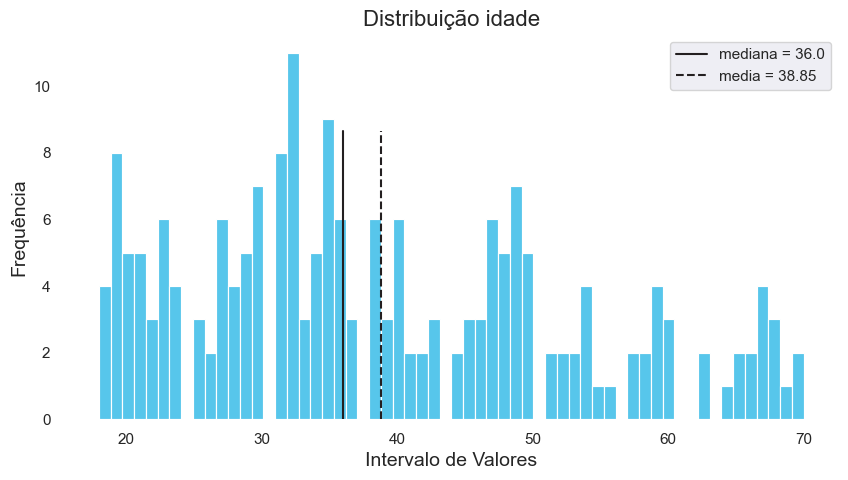

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


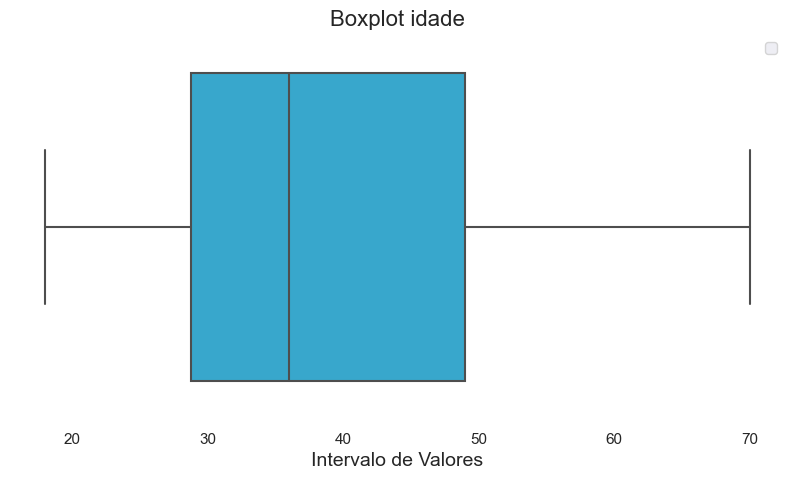

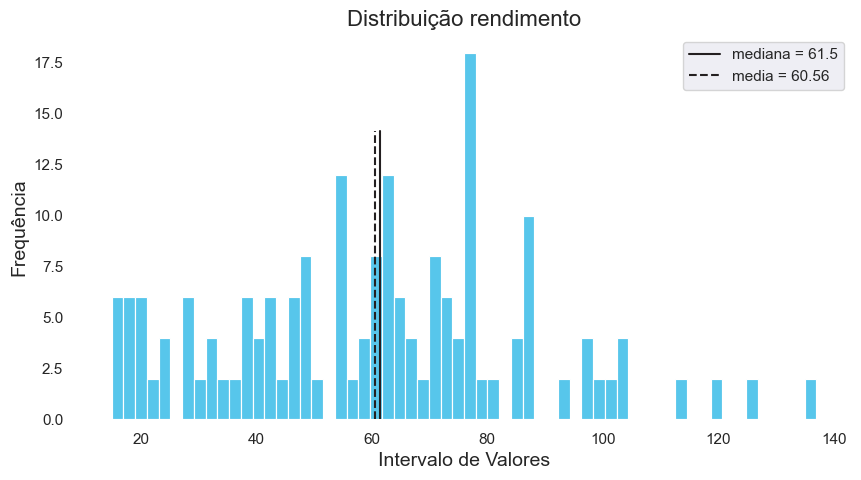

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


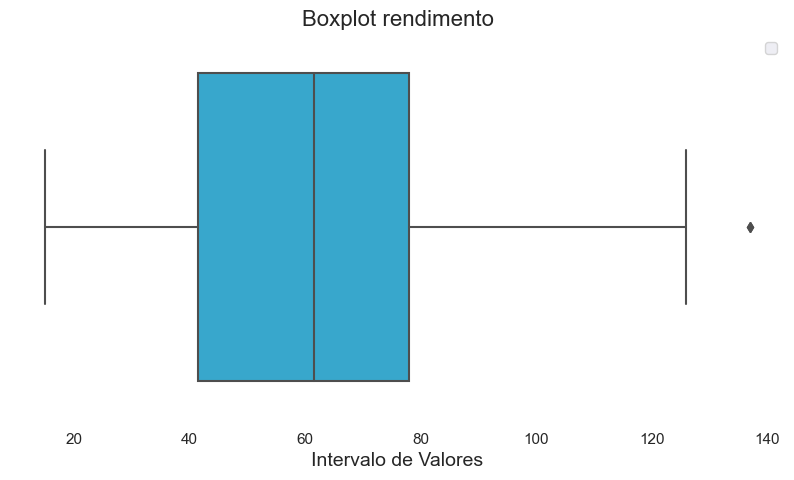

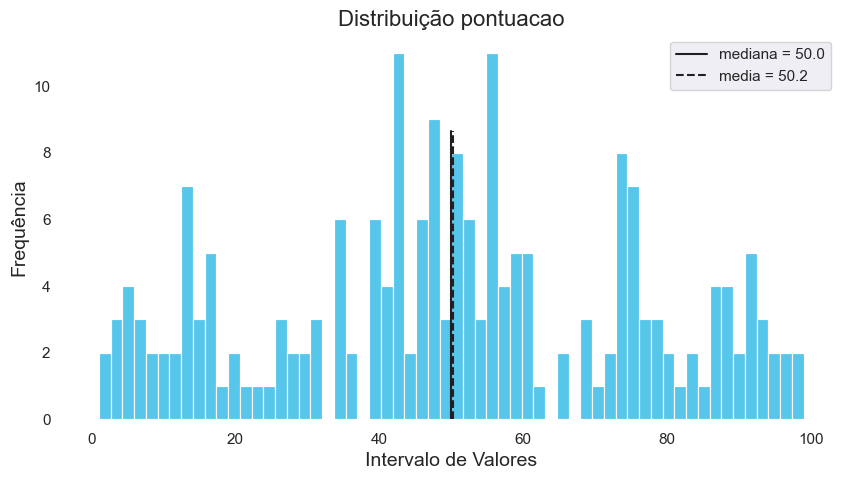

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


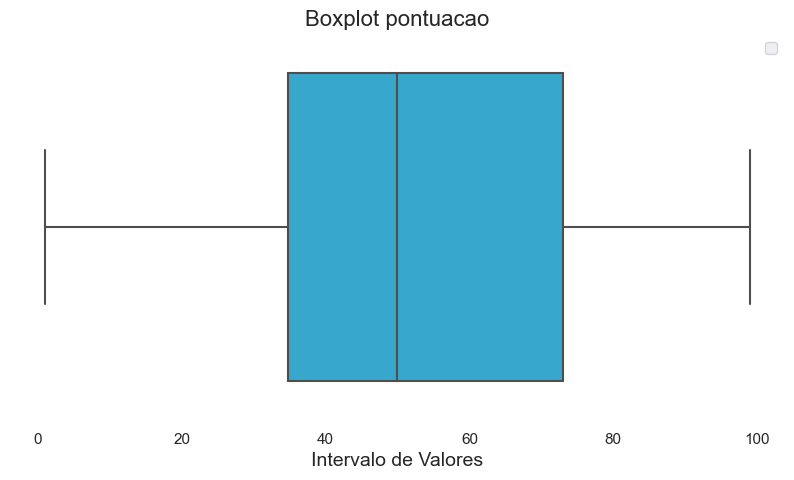

In [6]:
def plota_histograma(data, feature):

    mediana = data[feature].median()
    media = round(data[feature].mean(), 2)

    plt.figure(figsize = (10,5))
    sns.histplot(data = data, x = feature, color = '#1FB3E5', bins = 60)
    plt.title(f'Distribuição {feature}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.ylabel('Frequência', fontsize = 14)
    plt.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
    plt.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
    plt.box(False)
    plt.legend(loc = 'best')
    plt.show()

def plota_boxplot(data, feature):
    plt.figure(figsize = (10,5))
    sns.boxplot(data = data, x = feature, orient = 'h', color = '#1FB3E5')
    plt.title(f'Boxplot {feature}', fontsize = 16)
    plt.xlabel('Intervalo de Valores', fontsize = 14)
    plt.box(False)
    plt.legend(loc = 'best')
    plt.show()


features_quant = list(df.columns[2:])
for feature in features_quant:
    plota_histograma(df, feature)
    plota_boxplot(df, feature)
    

* Análise de Variáveis Qualitativas  

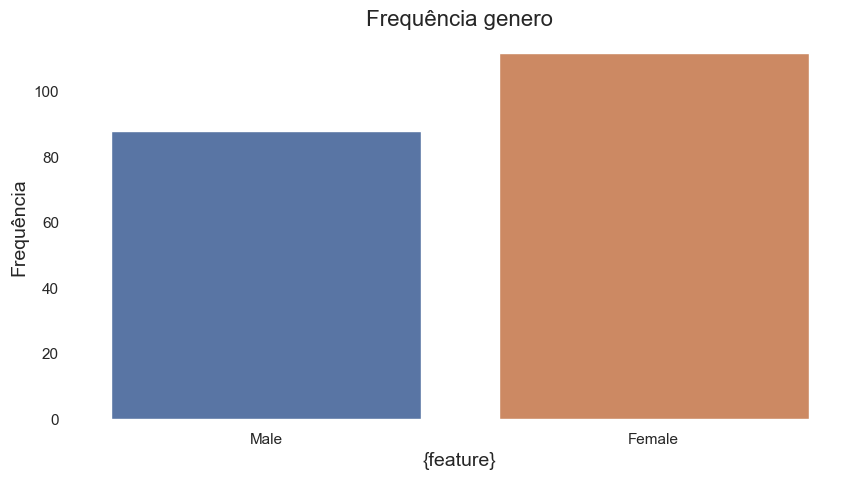

In [7]:
def plota_countplot(data, feature):
    plt.figure(figsize = (10,5))
    sns.countplot(data = data, x = feature)
    plt.title(f'Frequência {feature}', fontsize = 16)
    plt.xlabel('{feature}', fontsize = 14)
    plt.ylabel('Frequência', fontsize = 14)
    plt.box(False)
    plt.show()

plota_countplot(df, 'genero')


# <font color='red' style='font-size: 40px;'>4.0 Pré-Processamento </font>


* Excluindo Identificação de Cliente 

In [8]:
df2 = df.drop('identificacao', axis = 1)
df2.head()

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


* Label Encoding 

In [9]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(data, feature):
    return LabelEncoder().fit_transform(data[feature])

df2['genero'] = label_encoding(df, 'genero')
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


* Escalonamento 

In [10]:
from sklearn.preprocessing import StandardScaler

def padronizacao(data, feature, padroniza):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[feature])
    if padroniza == False:
        inverte_padronizacao = scaler.inverse_transform(data[feature])
        return inverte_padronizacao
    else:
        return padronizado


df2_esc = padronizacao(df2, list(df2.columns), True)
df2_esc = pd.DataFrame(data = df2_esc, columns = df2.columns)
df2_esc

,genero,idade,rendimento,pontuacao
0,1.13,-1.42,-1.74,-0.43
1,1.13,-1.28,-1.74,1.20
2,-0.89,-1.35,-1.70,-1.72
3,-0.89,-1.14,-1.70,1.04
4,-0.89,-0.56,-1.66,-0.40
...,...,...,...,...
195,-0.89,-0.28,2.27,1.12
196,-0.89,0.44,2.50,-0.86
197,1.13,-0.49,2.50,0.92
198,1.13,-0.49,2.92,-1.25


# <font color='red' style='font-size: 40px;'>5.0 Modelos de Clusterização e Redução de Dimensionalidade  </font>

> CONSULTAR:

https://medium.com/@isnardgurgel/an%C3%A1lises-com-algoritmos-de-clustering-40d52f36f67c

https://www.youtube.com/watch?v=GBSTT5NBE4g&t=1s&ab_channel=RafinhadosDados


## 5.1) K-Means 

> CONSULTAR:

https://medium.com/cwi-software/entendendo-clusters-e-k-means-56b79352b452

https://medium.com/@isnardgurgel/an%C3%A1lises-com-algoritmos-de-clustering-40d52f36f67c

https://www.youtube.com/watch?v=KN44-5oXZ7w&ab_channel=Meajuda%2CJH%21

https://www.youtube.com/watch?v=o6txmOn2IUk&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=2&ab_channel=DataICMC

https://www.youtube.com/watch?v=2hsMErlQtcI&list=PL-t7zzWJWPtzhZtI-bWWHFtCfxtjmBdIW&index=22&ab_channel=UniversoDiscreto

https://www.youtube.com/watch?v=p2twwtegYkU&list=PL-t7zzWJWPtzhZtI-bWWHFtCfxtjmBdIW&index=23&ab_channel=UniversoDiscreto

- Resumo KMeans: 

    - O KMeans é um Algoritmo Não-Supervisionado de Clusterização.
    - Ele tem bom desempenho em Clusters com formato esférico e bem separados.
    - Ele tem desempenho ruim quando os Clusters tem tamanhos variados, densidades diferentes ou formas não esféricas.
    - Seu intuito é Agrupar os Dados e rotulá-los.
    - Inicialmente, posiciona-se os Centróides aleatoriamente. 
    - Em seguida, o Algoritmo calcula a distância entre o Centróide mais próximo e cada registro a fim de rotulá-lo.
    - Com os rótulos prontos, a média entre os registros em cada cluster é calculada e o Centróide é movido para lá.
    - O processo se inicia novamente, até um momento que os Centróides parem de se mover.
    - O Algoritmo tem o baseia-se em uma característica chamada 'Inércia', a qual é a soma do quadrado da diferença entre cada ponto e o Centróide para cada um dos Clusters, de forma a termos Cluster muito Agrupados e com a Menor Inércia possível.
    - Para calcular o número de 'K' ideal, utiliza-se o Elbow Method (Regra do Cotovelo), o qual é um método gráfico que tenta achar o ponto de inflexão em uma relação entre o Número de Clusters e o Valor de Inércia. No ponto que parece um "cotovelo", lá estará o número ideal de Clusters para o K-Means.
    - Como métrica, tem-se o Coeficiente de Shilhouette, o qual análisa a Distância Intra-Cluster (distância média entre um dado e todos os outros dados no mesmo Cluster) e a Distância Entre-Clusters (distância média entre um dado e todos os outros dados do Cluster mais próximo). Quanto mais próximo de 1, mais próximos os dados de um mesmo Cluster estão e mais distantes dos Clusters vizinhos. 
    - Por ser um Algoritmo baseado em Distâncias, escalas das variáveis podem afetá-lo, portanto, é recomendado o Escalonamento dos dados.

### 1) Conceitos Fundamentais 

> 1. Primeiramente, inicializa-se os Centroides aleatoriamente (centros de um Cluster).

> 2. Depois, para cada registro na base de dados, calcula a distância para cada Centroide e associa ao que estiver mais perto.

> 3. Na próxima iteração, cada Centroide será movido para a posição média dos pontos de cada Cluster(repetir as etapas 2, 3).

> 4. Haverá iteração até chegarmos na Convergência, ou seja, não houver mais mudanças de registros entre os Cluster, ou seja, até os registros em azul ficarem apenas no Cluster Azul, os registros verdes ficarem apenas no Cluster Verde e os registros vermelhos ficarem apenas no Cluster Vermelho.

> 5. Por conta disso, ele é um Algoritmo caro computacionalmente, além de ser afetado por Outliers por sempre basear-se em Distâncias.

<img src = './img127.png' width = '70%'>
<img src = './img402.png' width = '70%'>
<img src = './img403.png' width = '70%'>
<img src = './img404.png' width = '70%'>

### 2) Fundamentos 

<img src = './img405.png' width = '70%'>
<img src = './img406.png' width = '70%'>
<img src = './img407.png' width = '70%'>
<img src = './img408.png' width = '70%'>
<img src = './img409.png' width = '70%'>
<img src = './img410.png' width = '70%'>
<img src = './img432.png' width = '70%'>
<img src = './img433.png' width = '70%'>
<img src = './img434.png' width = '70%'>
<img src = './img435.png' width = '70%'>


### 3) Implementação em Python do Algoritmo K-Means 

In [11]:
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


* Funções Importantes 



In [12]:
# Elbow Method
from sklearn.cluster import KMeans

def elbow_method(data, features):
    wcss = []
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
        kmeans.fit(data[features].values)
        # Inertia: Método para gerar o WCSS
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(np.arange(1, 11), wcss, marker = 'o', color = 'orange')
    plt.title('The Elbow Method')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.box(False)
    plt.show()

# KMeans
from sklearn.cluster import KMeans

def kmeans(data, features ,n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(data[features].values)

    centroides = kmeans.cluster_centers_ # Coordenadas do Centroide de Cada Clusters (4 linhas), para cada Variável (2 Variáveis)
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return centroides, clusters

# Plota Clusters e Controides 
import plotly.express as px 
import plotly.graph_objects as go

def plota_clusters(data, features ,model):

    centroides = pd.DataFrame(model[0])

    graf1 = px.scatter(x = data[features[0]], y = data[features[1]], color = model[1])
    graf2 = px.scatter(x = centroides[0].values, y = centroides[1].values, size = [15, 15, 15, 15])
    graf3 = go.Figure(data = graf1.data + graf2.data)
    graf3.update_layout(width = 800, height = 500, title_text = 'Agrupamento K-Means')
    graf3.update_xaxes(title = f'{features[0]}')
    graf3.update_yaxes(title = f'{features[1]}')
    graf3.show()


* KMeans com Dois Atributos 

Método de Elbow


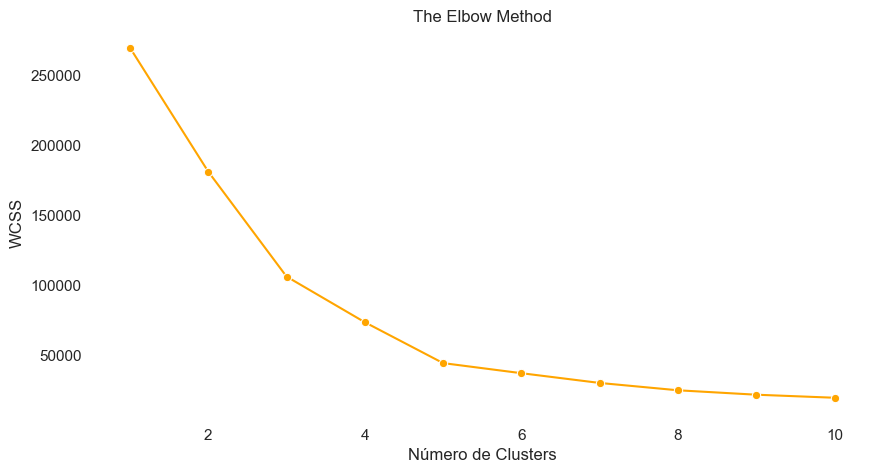


Resultados KMeans


(array([[26.30434783, 20.91304348],
        [86.53846154, 82.12820513],
        [87.        , 18.63157895],
        [48.26      , 56.48      ]]),
 array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 1]))


Gráfico da Clusterização


None

In [13]:
print('Método de Elbow')
elbow_method(df2, ['rendimento', 'pontuacao'])
print()
print('Resultados KMeans')
display(kmeans(df2, ['rendimento', 'pontuacao'], 4))
print()
print('Gráfico da Clusterização')
display(plota_clusters(df2, ['rendimento', 'pontuacao'], kmeans(df2, ['rendimento', 'pontuacao'], 4)))

* KMeans com Todos Atributos 

In [14]:
# Elbow Method
from sklearn.cluster import KMeans
def elbow_method_esc(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])
    wcss = []
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
        kmeans.fit(padronizado)
        # Inertia: Método para gerar o WCSS
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(np.arange(1, 11), wcss, marker = 'o', color = 'orange')
    plt.title('The Elbow Method')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.box(False)
    plt.show()

# KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
def kmeans_esc(data, features ,n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado)

    centroides = kmeans.cluster_centers_ # Coordenadas do Centroide de Cada Clusters (4 linhas), para cada Variável (2 Variáveis)
    centroides = scaler.inverse_transform(centroides)
    
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return centroides, clusters

Método de Elbow


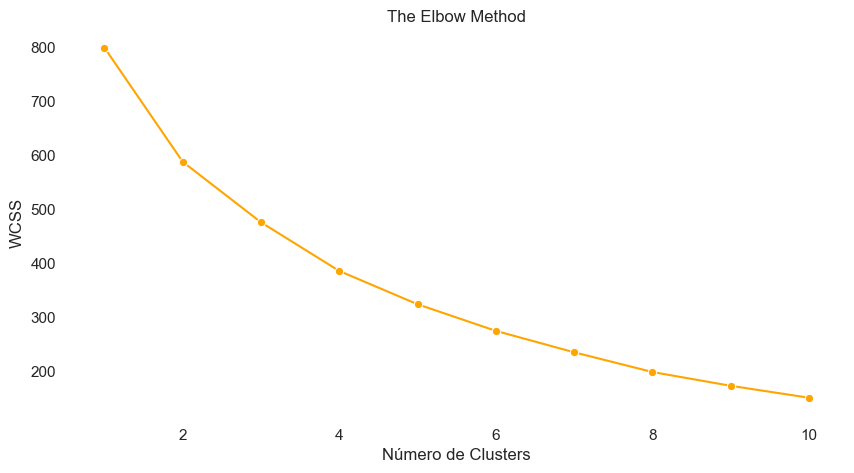


Resultados KMeans


,identificacao,genero,idade,rendimento,pontuacao,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,0
197,198,Male,32,126,74,5
198,199,Male,32,137,18,0


In [15]:
print('Método de Elbow')
elbow_method_esc(df2, list(df2.columns))
print()
print('Resultados KMeans')
agrupamentos_kmeans_esc = df.copy()
agrupamentos_kmeans_esc['cluster'] = kmeans_esc(df2, list(df2.columns), 6)[1]
agrupamentos_kmeans_esc

* KMeans com PCA 

In [16]:
# Elbow Method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def elbow_method_esc_pca(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])
    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)
    wcss = []
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
        kmeans.fit(padronizado_pca)
        # Inertia: Método para gerar o WCSS
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(np.arange(1, 11), wcss, marker = 'o', color = 'orange')
    plt.title('The Elbow Method')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.box(False)
    plt.show()

# KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
def kmeans_esc_pca(data, features ,n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)
    pca_variance_ratio = pca.explained_variance_ratio_

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado_pca)

    centroides = kmeans.cluster_centers_ # Coordenadas do Centroide de Cada Clusters (4 linhas), para cada Variável (2 Variáveis)
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return centroides, clusters, pca_variance_ratio

In [17]:
kmeans_esc_pca(df2, list(df2.columns), 4)[0]

array([[-1.15915328, -0.51472072],
       [ 1.12773395,  0.75231371],
       [ 0.80089898, -0.95285608],
       [-0.89924813,  1.20707643]])

Método de Elbow


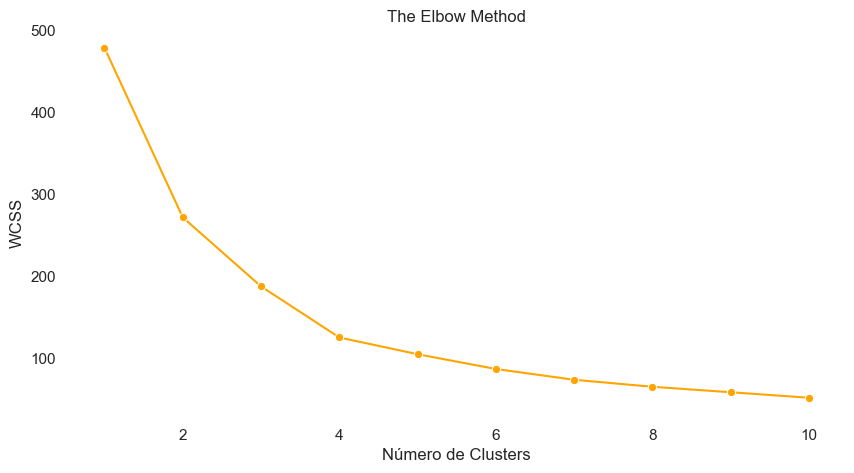


Razão das Variáveis Explicativas Pós PCA
[0.33690046 0.26230645]

Resultados KMeans


,identificacao,genero,idade,rendimento,pontuacao,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [18]:
print('Método de Elbow')
elbow_method_esc_pca(df2, list(df2.columns))
print()
print('Razão das Variáveis Explicativas Pós PCA')
print(kmeans_esc_pca(df2, list(df2.columns), 4)[2])
print()
print('Resultados KMeans')
agrupamento_kmeans_esc_pca = df.copy()
agrupamento_kmeans_esc_pca['cluster'] = kmeans_esc_pca(df2, list(df2.columns), 4)[1]
agrupamento_kmeans_esc_pca

## 5.2) Agrupamento Hierarquico

> CONSULTAR: 

https://medium.com/@will.lucena/agrupamento-hier%C3%A1rquico-329e30a9f32d

https://medium.com/@isnardgurgel/an%C3%A1lises-com-algoritmos-de-clustering-40d52f36f67c

https://www.youtube.com/watch?v=k6SPTavNPcg&list=PL0e9c9qL853Gz5ckps_71HNLXbiqAI81-&ab_channel=PauloFilgueiras

https://www.youtube.com/watch?v=fPHJIkyYi7M&ab_channel=UniversoDiscreto

https://www.youtube.com/watch?v=I-NSH_-Vm4g&list=PL-t7zzWJWPtzhZtI-bWWHFtCfxtjmBdIW&index=25&ab_channel=UniversoDiscreto

### 1) Conceitos Fundamentais 

<img src = './img127.png' width = '70%'>
<img src = './img412.png' width = '70%'>
<img src = './img413.png' width = '70%'>
<img src = './img414.png' width = '70%'>
<img src = './img415.png' width = '70%'>
<img src = './img416.png' width = '70%'>
<img src = './img417.png' width = '70%'>
<img src = './img418.png' width = '70%'>
<img src = './img419.png' width = '70%'>
<img src = './img420.png' width = '70%'>
<img src = './img421.png' width = '70%'>
<img src = './img431.png' width = '70%'>

### 2) Fundamentos 

<img src = './img422.png' width = '70%'>
<img src = './img423.png' width = '70%'>
<img src = './img424.png' width = '70%'>
<img src = './img425.png' width = '70%'>
<img src = './img426.png' width = '70%'>
<img src = './img427.png' width = '70%'>
<img src = './img428.png' width = '70%'>
<img src = './img429.png' width = '70%'>
<img src = './img430.png' width = '70%'>


### 3) Implementação do Algoritmo Agrupamento Hierárquico no Python 

In [19]:
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram, linkage 

def dendrograma(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)

    dendrograma = dendrogram(linkage(padronizado_pca, method = 'complete'))
    plt.show()

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def agrup_hierarq_esc_pca(data, features ,n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)
    pca_variance_ratio = pca.explained_variance_ratio_

    hier = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'complete')
    clusters = hier.fit_predict(padronizado_pca)

    return clusters, pca_variance_ratio

def plota_clusters_agrup_hier(data, features, model):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)

    graf= px.scatter(x = padronizado_pca[:, 0], y = padronizado_pca[:, 1], color = model[0])
    graf.update_layout(width = 800, height = 500, title_text = 'Agrupamento K-Means')
    graf.show()



Dendograma


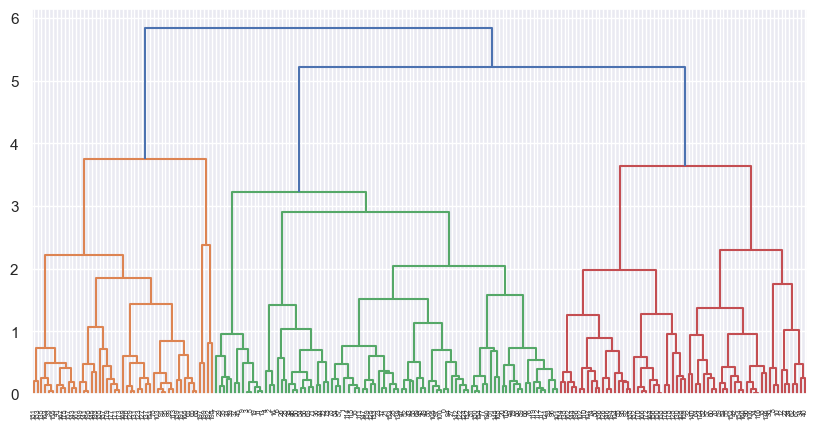


Resultados Agrupamento Hierárquico


(array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
        2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
        2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1,
        1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0,
        2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
        1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
        0, 0], dtype=int64),
 array([0.33690046, 0.26230645]))


Gráfico da Clusterização


None

,identificacao,genero,idade,rendimento,pontuacao,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [21]:
print('Dendograma')
dendrograma(df2, list(df2.columns))
print()
print('Resultados Agrupamento Hierárquico')
display(agrup_hierarq_esc_pca(df2, list(df2.columns), 3))
print()
print('Gráfico da Clusterização')
display(plota_clusters_agrup_hier(df2, list(df2.columns), agrup_hierarq_esc_pca(df2, list(df2.columns), 3)))
agrupamento_hier_esc_pca = df.copy()
agrupamento_hier_esc_pca['cluster'] = agrup_hierarq_esc_pca(df2, list(df2.columns), 3)[0]
agrupamento_hier_esc_pca

## 5.3) DBSCAN

> CONSULTAR: 

https://gabriellm.medium.com/entendendo-dbscan-770f680d9160

https://medium.com/@isnardgurgel/an%C3%A1lises-com-algoritmos-de-clustering-40d52f36f67c

https://www.youtube.com/watch?v=o6txmOn2IUk&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=2&ab_channel=DataICMC

https://www.youtube.com/watch?v=XEMVQrZaDY0&ab_channel=AbelSiqueira

## 1) Conceitos Fundamentais 

> 1. Baseado em densidade e agrupando os pontos similares no mesmo espaço, ele tenta encontrar os pontos que são separados por uma distância não maior do que um limiar.

> 2. Não é necessário especificar o número de clusters.

> 3. Seu objetivo é que cada grupo tenha pelo menos um número mínimo de registros, considerando como condição de vizinhança uma distância menor ou igual a EPS. Lembrando que a métrica distância (Manhatan ou Euclidiana) importa bastante.

> 4. Em geral, apresenta melhores resultados e mais velocidade que o K-Means. Isso ocorre pois ele não é tão refém da inicialização dos "centroides".

> 5. Sua deficiência está na aleatoriedade de pontos iniciais. Caso ele inicie as buscas de Raio por um registro que é Cluster A, mas está próximo do Cluster B, ele pode considerar esse registro já como um Cluster B; por isso precisamos realizar muitos testes antes de validá-lo.

> 6. Vantagens
- Robusto a OUTLIERS

- Pode detectar qualquer tipo de forma de Cluster, seja formas esféricas ou irregulares

- Custo Computacional não é tão alto

- Segundo Algoritmo de Clusterização mais utilizado

> 7. Desvantagens
- Não funciona bem com dados de alta dimensionalidade, pois as métricas de distância acabam não fazendo mais tanto sentido

- Não consegue identificar clusters de várias densidades (distância entre os dados, ou seja, em Clusters os quais o Cluster A tem dados muito juntos e próximos, e o Cluster B tem dados muito separados e distantes), uma vez que os parâmetros EPS e min_samples são fixos

- A parametrização de EPS e min_samples nem sempre é uma tarefa fácil, pois temos de analisar precisamente a Distribuição dos nossos dados

<img src = './img436.png' width = '70%'>
<img src = './img437.png' width = '70%'>
<img src = './img438.png' width = '70%'>
<img src = './img439.png' width = '70%'>

## 2) Fundamentos 

<img src = './img440.png' width = '70%'>
<img src = './img441.png' width = '70%'>
<img src = './img442.png' width = '70%'>
<img src = './img443.png' width = '70%'>
<img src = './img444.png' width = '70%'>
<img src = './img445.png' width = '70%'>
<img src = './img446.png' width = '70%'>
<img src = './img447.png' width = '70%'>
<img src = './img448.png' width = '70%'>
<img src = './img449.png' width = '70%'>

### 3) Implementação do Algoritmo DBSCAN no Python 

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def dbscan(data, features ,n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)
    pca_variance_ratio = pca.explained_variance_ratio_

    dbscan = DBSCAN(eps = 0.33, min_samples = 3)
    dbscan.fit(padronizado_pca)
    clusters = dbscan.labels_

    return clusters, pca_variance_ratio

def plota_clusters_dbscan(data, features, model):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)

    graf= px.scatter(x = padronizado_pca[:, 0], y = padronizado_pca[:, 1], color = model[0])
    graf.update_layout(width = 800, height = 500, title_text = 'Agrupamento DBSCAN')
    graf.show()



In [23]:
print('Resultados DBSCAN - Pontos Negativos são os Ruídos/Outliers')
display(dbscan(df2, list(df2.columns), 3))
print()
print('Gráfico da Clusterização')
display(plota_clusters_dbscan(df2, list(df2.columns), dbscan(df2, list(df2.columns), 3)))
agrupamento_dbscan_esc_pca = df.copy()
agrupamento_dbscan_esc_pca['cluster'] = dbscan(df2, list(df2.columns), 3)[0]
agrupamento_dbscan_esc_pca

Resultados Agrupamento Hierárquico - Pontos Negativos são os Ruídos/Outliers


(array([ 0,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  2,  1,  0,  0, -1,
         0,  0,  1,  0,  0,  2,  0,  2,  0,  0,  0,  0,  1, -1,  1, -1,  0,
         2,  1,  0, -1,  0,  1,  2,  0,  0,  3,  0, -1,  0,  3,  3,  3,  0,
        -1,  3,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  4,  0,
         0,  0,  4,  0, -1,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  4, -1, -1, -1], dtype=int64),
 array([0.33690046, 0.26230645]))


Gráfico da Clusterização


None

,identificacao,genero,idade,rendimento,pontuacao,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


> 1. Os dados tem diferenças de densidade, portanto, a Distribuição dos Clusters não ficaram muito interessantes 

## 5.4) MeanShift

> CONSULTAR: 

https://medium.com/@isnardgurgel/an%C3%A1lises-com-algoritmos-de-clustering-40d52f36f67c

### 1) Conceitos Fundamentais 

> 1. Diferentemente do K-Means, o Mean-Shift não requer a especificação do número de clusters

> 2. Assim como o DBSCAN, o Mean-Shift procura regiões de alta densidade e afirma que ali existe clusters.

> 3. Funcionamento

- Ele começa como fazendo cada ponto um Cluster. 
- Posteriormente, ele calcula a média de um grupo de pontos dentro de uma Área Circular que ele cria para cada ponto
- Por fim, ele analisa o ponto com maior Densidade em volta e faz a Clusterização
    
> 4. Vantagens

- Robusto a OUTLIERS
- Serve para vários tipos de aplicações
- Pode detectar qualquer tipo de forma dependendo apenas do Número de Banda
- Apenas um parâmetro para ser ajustado
- Muito aplicado em Visão Computacional

> 5. Desvantagens

- Não funciona bem com dados de alta dimensionalidade
- A parametrização da largura de banda não é tão simples
- Computacionalmente caro

### 2) Fundamentação 

<img src = './img450.png' width = '70%'>
<img src = './img451.png' width = '70%'>
<img src = './img452.png' width = '70%'>
<img src = './img453.png' width = '70%'>

### 3) Implementação do Algoritmo MeanShift em Python 

In [26]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def meanshift(data, features ,n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)
    pca_variance_ratio = pca.explained_variance_ratio_

    meanshift = MeanShift(bandwidth=1, cluster_all = True)
    meanshift.fit(padronizado_pca)
    clusters = meanshift.labels_

    return clusters, pca_variance_ratio

def plota_clusters_meanshift(data, features, model):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    pca = PCA(n_components=2)
    padronizado_pca = pca.fit_transform(padronizado)

    graf= px.scatter(x = padronizado_pca[:, 0], y = padronizado_pca[:, 1], color = model[0])
    graf.update_layout(width = 800, height = 500, title_text = 'Agrupamento Meanshift')
    graf.show()



In [27]:
print('Resultados Meanshift - Pontos Negativos são os Ruídos/Outliers')
display(meanshift(df2, list(df2.columns), 3))
print()
print('Gráfico da Clusterização')
display(plota_clusters_meanshift(df2, list(df2.columns), meanshift(df2, list(df2.columns), 3)))
agrupamento_meanshift_esc_pca = df.copy()
agrupamento_meanshift_esc_pca['cluster'] = meanshift(df2, list(df2.columns), 3)[0]
agrupamento_meanshift_esc_pca

Resultados Meanshift - Pontos Negativos são os Ruídos/Outliers


(array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
        0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
        1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
        0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2,
        3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 3,
        3, 2], dtype=int64),
 array([0.33690046, 0.26230645]))


Gráfico da Clusterização


None

,identificacao,genero,idade,rendimento,pontuacao,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


## 5.5) K-Protypes 

> CONSULTAR:

https://medium.com/@keswani-rohitkumar/k-prototypes-clustering-algorithm-f5d8e09a0104

https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede

https://www.youtube.com/watch?v=Iit7y3H_yqY&ab_channel=AIDecoder

### 1) Conceitos Fundamentais

> 1. Algoritmo para Agrupamento de Dados Mistos (Categóricos e Numéricos)

## 5.6) K-Modes 

> CONSULTAR: 

### 1) Conceitos Fundamentais

> 1. Algoritmo para Agrupamento de Dados Categóricos

# <font color='red' style='font-size: 40px;'>6.0 Segmentação de Vinhos </font>

> CONSULTAR:

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
